In [8]:
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

In [104]:
data = loadmat('data3.mat')
print(type(data))               # 查看数据格式
X = data['X']
y = data['y']
X,y


<class 'dict'>


(array([[-1.58986e-01,  4.23977e-01],
        [-3.47926e-01,  4.70760e-01],
        [-5.04608e-01,  3.53801e-01],
        [-5.96774e-01,  1.14035e-01],
        [-5.18433e-01, -1.72515e-01],
        [-2.92627e-01, -2.07602e-01],
        [-1.58986e-01, -4.38596e-02],
        [-5.76037e-02,  1.43275e-01],
        [-7.14286e-02,  2.71930e-01],
        [-2.97235e-01,  3.47953e-01],
        [-4.17051e-01,  2.01754e-01],
        [-4.40092e-01,  8.77193e-03],
        [-3.24885e-01, -3.21637e-02],
        [-2.46544e-01,  5.55556e-02],
        [-2.18894e-01,  2.01754e-01],
        [-3.43318e-01,  1.60819e-01],
        [-5.09217e-01,  7.89474e-02],
        [-3.84793e-01, -9.06433e-02],
        [-1.49770e-01,  1.25731e-01],
        [-1.95853e-01,  3.24561e-01],
        [-3.91705e-02, -2.19298e-01],
        [-1.08295e-01, -3.01170e-01],
        [-1.86636e-01, -3.30409e-01],
        [-2.18894e-01, -4.23977e-01],
        [-8.06452e-02, -5.64327e-01],
        [ 6.68203e-02, -5.17544e-01],
        [ 9.

### 读取数据，将数据按照7:3进行分割

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.7, test_size=0.3)
X.shape

(211, 2)

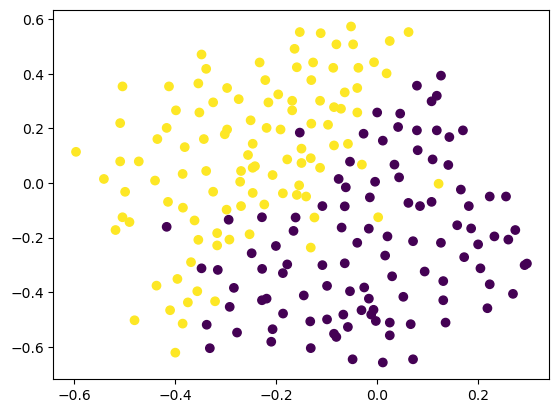

In [106]:
# 将数据进行可视化
plt.scatter(X[:, 0], X[:, 1], c=y.flatten())

In [107]:
y_train.shape, X_train.shape

((147, 1), (147, 2))

### 对训练集的数据进行训练

In [108]:
#调用SVM.linearSVC接口对模型进行训练
model = svm.LinearSVC(C=1,max_iter=10000)
model.fit(X_train, y_train.ravel())

LinearSVC(C=1, max_iter=10000)

### 将训练好的模型用来分别计算训练集和测试集的准确率

In [109]:
print('测试集准确率为：%.2f %%' % (100 * model.score(X_test, y_test)))
print('训练集准确率为：%.2f %%' % (100 * model.score(X_train, y_train)))

测试集准确率为：85.94 %
训练集准确率为：95.24 %


In [110]:
def plot_boundary(model, args):
    xx, yy = np.meshgrid(np.linspace(args[0], args[1], 100), np.linspace(args[2], args[3], 100))
    X = np.c_[xx.ravel(),yy.ravel()]
    y_pred = model.predict(X).reshape(xx.shape)
    y_decision = model.decision_function(X).reshape(xx.shape)
    plt.contour(xx,yy,y_pred,cmap=plt.cm.winter)
    plt.contour(xx,yy,y_decision,cmap=plt.cm.winter,alpha=0.2)

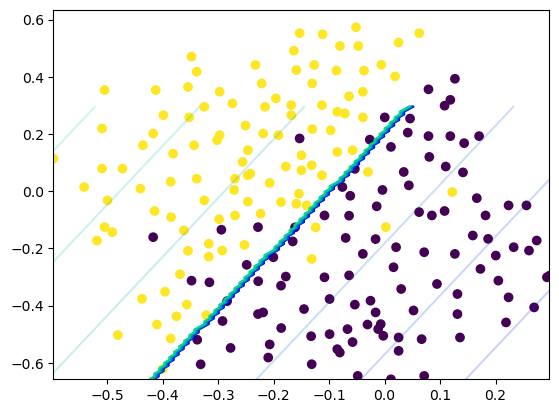

In [117]:
plt.scatter(X[:,0],X[:,1],c=y.flatten())
plot_boundary(model,[X_train[:,0].min(),X_train[:,0].max(),X_train[:,1].min(),X_train[:,0].max()])

In [118]:
# 软惩罚参数C=1的情况
model1 = svm.SVC(kernel='rbf',C=1,gamma=8,max_iter=10000)
model1.fit(X_train, y_train.ravel())

SVC(C=1, gamma=8, max_iter=10000)

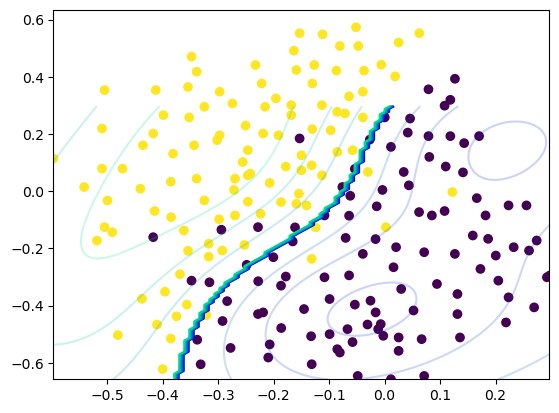

In [119]:
plt.scatter(X[:,0],X[:,1],c=y.flatten())
plot_boundary(model1,[X_train[:,0].min(),X_train[:,0].max(),X_train[:,1].min(),X_train[:,0].max()])

In [114]:
model2 = svm.SVC(kernel='rbf',max_iter=10000)
model2.fit(X_train, y_train.ravel())

SVC(max_iter=10000)

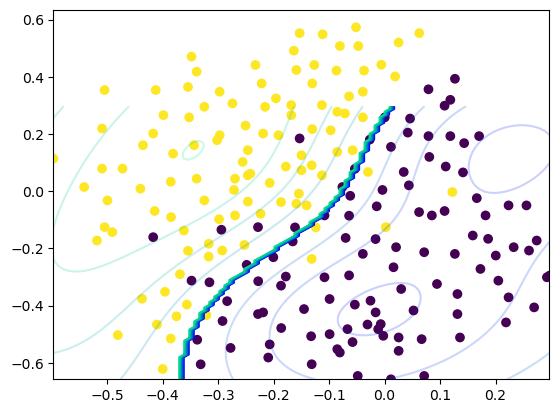

In [115]:
plt.scatter(X[:,0],X[:,1],c=y.flatten())
plot_boundary(model2,[X_train[:,0].min(),X_train[:,0].max(),X_train[:,1].min(),X_train[:,0].max()])

In [116]:
[X_train[:,0].min(),X_train[:,0].max(),X_train[:,1].min(),X_train[:,0].max()]

[-0.596774, 0.297235, -0.657895, 0.297235]